In [ ]:
Data collection and processing

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('HR Data - Capstone.csv')

In [2]:
count=df.count()
missingvalues=df.isnull().sum()
mean_hrs=df['Hrs'].mean()
cardinality =df['Rating'].nunique()
print("count:",count)
print("missing Values:",missingvalues)
print("Average vales:",mean_hrs)
print("cardinality:",cardinality)


count: EmployeeId              500
Hrs                     492
Rating                  500
EmployeeSatisfaction    500
dtype: int64
missing Values: EmployeeId              0
Hrs                     8
Rating                  0
EmployeeSatisfaction    0
dtype: int64
Average vales: 11.309992252833334
cardinality: 6


In [ ]:
Data cleaning:

In [3]:
df['Rating'] = df['Rating'].replace({'Un satisfactory': 'Unsatisfactory', 'satisfactory': 'Satisfactory'})

df['Rating'].nunique()


4

In [4]:

df['Hrs']=df['Hrs'].fillna(mean_hrs)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeId            500 non-null    object 
 1   Hrs                   500 non-null    float64
 2   Rating                500 non-null    object 
 3   EmployeeSatisfaction  500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


              Hrs  EmployeeSatisfaction
count  500.000000            500.000000
mean    11.309992              7.240000
std      5.224125              1.006193
min      0.091720              6.000000
25%      9.756531              6.000000
50%     11.236353              7.000000
75%     12.609561              8.000000
max    120.398464              9.000000


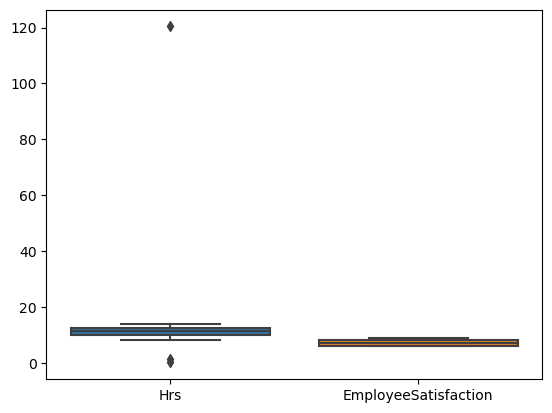

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Display summary statistics
print(df.describe())

# Create a box plot for numerical columns
sns.boxplot(data=df)
plt.show()


In [ ]:
Understanding the distributions and patterns within the HR data.

In [6]:
df['Rating'].mode()

0    Excellent
Name: Rating, dtype: object

In [7]:
unsatisfactory_data = df[df['Rating'] == 'Unsatisfactory']
unsatisfactory_data['Hrs'].max() 
unsatisfactory_data['Hrs'].min()

0.091720323

In [8]:
unsatisfactory_data = df[df['Rating'] == 'Unsatisfactory']
unsatisfactory_data['Hrs'].max() 
#unsatisfactory_data['Hrs'].min()

8.489765491

Text(0, 0.5, 'Count')

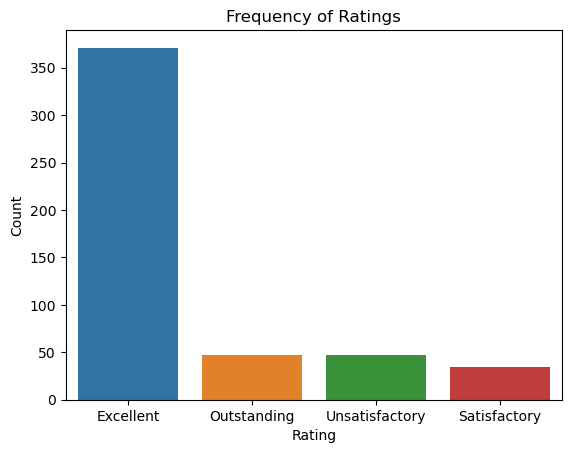

In [9]:
rating_counts = df['Rating'].value_counts()

# Plot bar chart
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Frequency of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

In [10]:
average_hours_by_rating = df.groupby('Rating')['Hrs'].mean().reset_index()

# Display the result
print(average_hours_by_rating)

           Rating        Hrs
0       Excellent  11.659167
1     Outstanding  13.739970
2    Satisfactory   8.930877
3  Unsatisfactory   7.895444


In [11]:
satisfaction_frequencies = df['EmployeeSatisfaction'].value_counts()

# Display the result
print(satisfaction_frequencies)

EmployeeSatisfaction
7    161
6    142
8    132
9     65
Name: count, dtype: int64


In [12]:
average_hours_by_rating = df.groupby('Rating')['Hrs'].mean()

# Identify the rating with the highest average working hours
highest_average_hours_rating = average_hours_by_rating.idxmax()
print(highest_average_hours_rating)

Outstanding


In [ ]:
Part 2) Identifying and excluding the outliers!

In [13]:
Q1 = df['Hrs'].quantile(0.25)
Q3 = df['Hrs'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower cutoff values
lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR
print(lower_cutoff)
print(upper_cutoff)

filtered_df =df[(df['Hrs'] >= lower_cutoff) & (df['Hrs'] <= upper_cutoff)]



5.476985655624999
16.889106902625002


In [14]:
 filtered_df['Hrs'].mean()

11.13305531593293

In [15]:
hours_by_rating = df.groupby('Rating')['Hrs'].mean()
print(hours_by_rating)
witnessing_changes=filtered_df.groupby('Rating')['Hrs'].mean()
print(witnessing_changes)

Rating
Excellent         11.659167
Outstanding       13.739970
Satisfactory       8.930877
Unsatisfactory     7.895444
Name: Hrs, dtype: float64
Rating
Excellent         11.365277
Outstanding       13.739970
Satisfactory       8.930877
Unsatisfactory     8.213704
Name: Hrs, dtype: float64


In [ ]:
Part 3) Understanding probability distributions and Confidence interval

In [16]:
# Calculate the probabilities for each rating
rating_probabilities = df['Rating'].value_counts(normalize=True)
print(rating_probabilities)

Rating
Excellent         0.742
Outstanding       0.094
Unsatisfactory    0.094
Satisfactory      0.070
Name: proportion, dtype: float64


In [17]:
from scipy.stats import binom
prob_outstanding = rating_probabilities.get('Outstanding', 0) 
sample=10
sucess=2
probability_2_outstanding = binom.pmf(sucess,sample, prob_outstanding)
print(probability_2_outstanding)

0.18050689776637466


In [18]:
from scipy.stats import binom
prob_outstanding = rating_probabilities.get('Outstanding', 0) 
sample=10

probability_2_outstanding = 1-binom.cdf(2,sample, prob_outstanding)
print(probability_2_outstanding)

0.06024192183848609


In [22]:
from scipy.stats import binom

prob_outstanding = rating_probabilities.get('Outstanding', 0) 
prob_excellent = rating_probabilities.get('Excellent', 0) 
sum_prob=prob_outstanding+prob_excellent
sample=10
probability_7_both = binom.pmf(7,sample,sum_prob)

probability_7_both1 =1- binom.cdf(7,sample,sum_prob)
print(probability_7_both)


0.1510625224395229


In [23]:
from scipy.stats import binom
prob_unsatisfactory = rating_probabilities.get('Unsatisfactory', 0) 
sample=10
sucess=0
probability_2_unsatisfactory = binom.pmf(sucess,sample, prob_unsatisfactory)
print(probability_2_unsatisfactory)


0.3726335695763792


In [24]:
filtered_df['Hrs'].mean()
print(round(filtered_df['Hrs'].mean()))

11


In [25]:
filtered_df['Hrs'].std()
print(round(filtered_df['Hrs'].std()))

2


In [28]:
import scipy.stats as norm
import scipy.stats as stats

mean_hours_filtered = filtered_df['Hrs'].mean()
std_dev_hours_filtered =filtered_df['Hrs'].std()

value = 9

z_score = (value - mean_hours_filtered ) / std_dev_hours_filtered


probability_less_than_9_hours = stats.norm.cdf(z_score)


print(round(probability_less_than_9_hours,2))

0.11


In [29]:
import scipy.stats as stats

mean_hours_filtered = filtered_df['Hrs'].mean()
std_dev_hours_filtered = filtered_df['Hrs'].std()

# Define the values for the range (11 to 14)
lower_value = 11
upper_value = 14

z_score_lower = (lower_value - mean_hours_filtered) / std_dev_hours_filtered
z_score_upper = (upper_value - mean_hours_filtered) / std_dev_hours_filtered


probability_between_11_to_14_hours = stats.norm.cdf(z_score_upper) - stats.norm.cdf(z_score_lower)
print(probability_between_11_to_14_hours )

0.48233896159697887


In [30]:
mean_hours_filtered = filtered_df['Hrs'].mean()
std_dev_hours_filtered = filtered_df['Hrs'].std()

# Number of observations
n_observations = len(filtered_df)

# Degrees of freedom (n - 1 for a sample)
degrees_of_freedom = n_observations - 1

# Confidence level
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = stats.t.ppf(1 + confidence_level) / 2, degrees_of_freedom) * (std_dev_hours_filtered/ (n_observations ** 0.5))

# Calculate the confidence interval
confidence_interval_lower = mean_hours_filtered - margin_of_error
confidence_interval_upper = mean_hours_filtered + margin_of_error

print(confidence_interval_lower,confidence_interval_upper)

10.980916323094652 11.285194308771208


In [ ]:
 filtered_df.describe()

In [ ]:
 filtered_df['Hrs']

In [ ]:
df['Hrs']